#  Bike Sharing Assignment

In [74]:
#Filter Warnings
import warnings
warnings.filterwarnings('ignore')

#Importing required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.feature_selection import RFE
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

## 1. Data understanding

In [75]:
#Reading data "day.csv" as bike
bike = pd.read_csv("day.csv")
bike.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [76]:
#Checking the shape of dataframe bike
bike.shape

(730, 16)

In [77]:
#Descriptive information
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


- ***There are no null columns in the dataset***

In [78]:
#Checking the summary of the numeric columns
bike.describe()

,instant,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
mean,365.500000,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000
max,730.000000,4.000000,1.000000,12.000000,1.000000,6.000000,1.000000,3.000000,35.328347,42.044800,97.250000,34.000021,3410.000000,6946.000000,8714.000000


## 2. Data Cleaning

Ignoring the following columns such as: 
- 1."instant" as it is an index column.
- 2."dteday" we have "yr", "mnth" with same info. 
- 3."casual" and "registered" as "cnt" is sum of the both.


In [79]:
#Creating new dataframe with required columns as bike1
bike1 = bike[["season", "yr","mnth", "holiday", "weekday", "workingday", "weathersit","temp","atemp",
                 "hum","windspeed","cnt"]]
bike1.head()    

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,985
1,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,801
2,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,1349
3,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,1562
4,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,1600




- You can observe that some of the variables like 'weathersit' and 'season' have values as 1, 2, 3, 4 which have specific labels associated with them. so replacing them respectively.

In [80]:
#Replacing values in season 
bike1["season"].replace({1 : "spring", 2 : "summer" , 3 : "fall", 4 : "winter"} , inplace = True)

In [81]:
#Replacing values in mnth
bike1['mnth'].replace({1 : "Jan", 2 : "Feb", 3 : "Mar", 4 : "Apr", 5 : "May", 6 : "June", 7 : "July", 8 : "Aug",
                       9 : "Sept", 10 : "Oct", 11 : "Nov", 12 : "Dec"} ,inplace=True)

In [82]:
#Replacing values in weekday 
bike1['weekday'].replace({0:"Sunday",1:"Monday",2:"Tuesday",3:"Wednesday",4:"Thursday",5:"Friday",6:"Saturday"} ,inplace=True)

In [83]:
#Replacing values in weathersit
bike1["weathersit"].replace({1 : "Clear_PartlyCloudy", 2 : "Mist+Cloudy" , 3 : "LightSnow_LightRain+Thunderstorm", 4 : "HeavyRain_IcePallets_Thunderstorm_Mist"} , inplace = True)

In [84]:
#Checking the bike1 dataframe
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist+Cloudy,14.110847,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist+Cloudy,14.902598,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,8.050924,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,8.200000,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,9.305237,11.46350,43.6957,12.522300,1600


In [85]:
#Checking dtypes of columns in bike1
bike1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    object 
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    object 
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    object 
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    object 
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(4), object(4)
memory usage: 68.6+ KB


### Changing datatypes

In [86]:
#Changing dtypes of column to category
bike[["season", "weekday", "weathersit", "mnth"]] = bike[["season", "weekday", "weathersit", "mnth"]].astype('category')

In [87]:
#Checking dtypes
bike.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   instant     730 non-null    int64   
 1   dteday      730 non-null    object  
 2   season      730 non-null    category
 3   yr          730 non-null    int64   
 4   mnth        730 non-null    category
 5   holiday     730 non-null    int64   
 6   weekday     730 non-null    category
 7   workingday  730 non-null    int64   
 8   weathersit  730 non-null    category
 9   temp        730 non-null    float64 
 10  atemp       730 non-null    float64 
 11  hum         730 non-null    float64 
 12  windspeed   730 non-null    float64 
 13  casual      730 non-null    int64   
 14  registered  730 non-null    int64   
 15  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(7), object(1)
memory usage: 72.5+ KB


In [88]:
#Checking value counts for every column.
bcolumn = bike1.columns    #creating list for all columns 
for col in bcolumn:
    print(bike1[col].value_counts(), '\n')    

fall      188
summer    184
spring    180
winter    178
Name: season, dtype: int64 

0    365
1    365
Name: yr, dtype: int64 

Jan     62
Mar     62
May     62
July    62
Aug     62
Oct     62
Dec     62
Apr     60
June    60
Sept    60
Nov     60
Feb     56
Name: mnth, dtype: int64 

0    709
1     21
Name: holiday, dtype: int64 

Monday       105
Tuesday      105
Wednesday    104
Thursday     104
Friday       104
Saturday     104
Sunday       104
Name: weekday, dtype: int64 

1    504
0    226
Name: workingday, dtype: int64 

Clear_PartlyCloudy                  463
Mist+Cloudy                         246
LightSnow_LightRain+Thunderstorm     21
Name: weathersit, dtype: int64 

26.035000    5
10.899153    5
27.880000    4
28.563347    4
23.130847    4
            ..
27.435847    1
26.376653    1
28.989419    1
28.700000    1
8.849153     1
Name: temp, Length: 498, dtype: int64 

32.73440    4
18.78105    3
31.85040    3
28.59875    2
23.32625    2
           ..
28.94730    1
30.46145 

 - There are no junk values in dataframe

## 3. EDA

### Pairplots of numeric variables

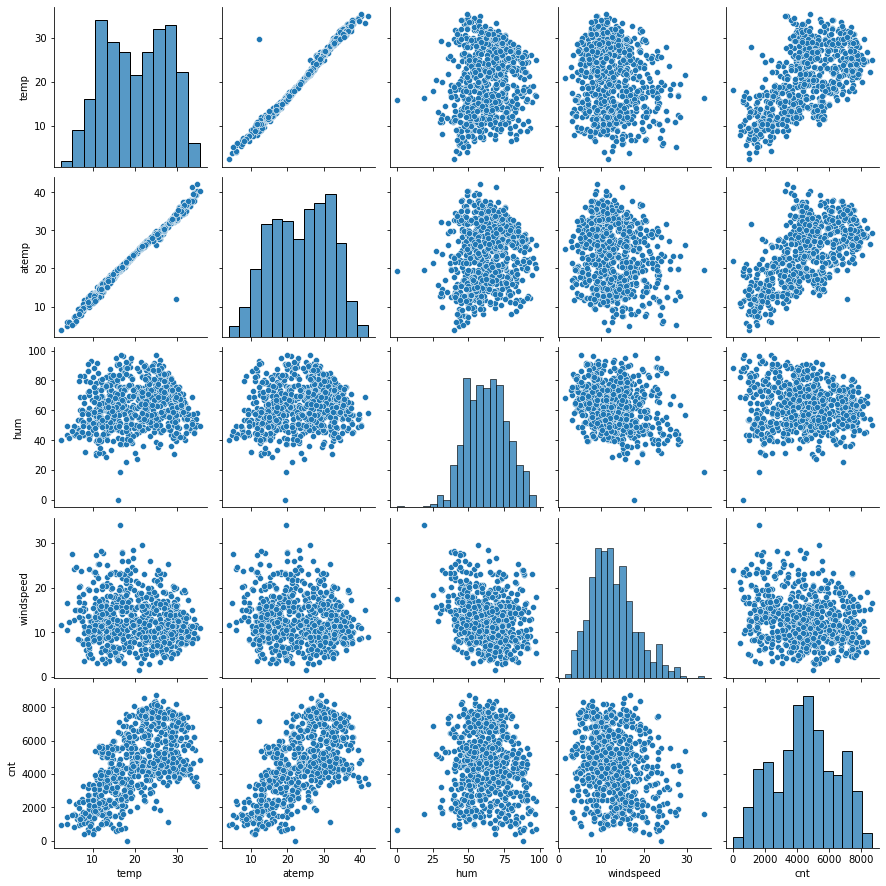

In [89]:
clmns = bike1[[ 'temp', 'atemp', 'hum', 'windspeed', 'cnt']]   #Saving numeric columns in the list
#Plotting pairplots
sns.pairplot(clmns)   
plt.show()

### Correlation Matrix

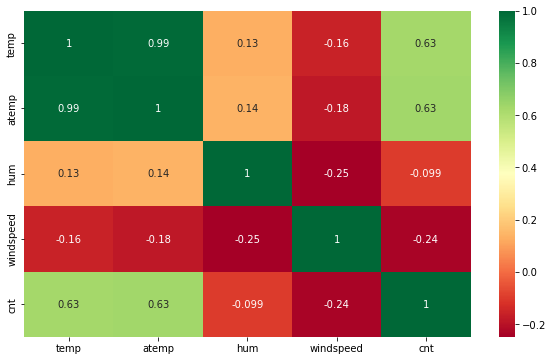

In [90]:
plt.figure(figsize = (10 , 6))
#Plotting heatmap
sns.heatmap( clmns.corr() , annot = True, cmap="RdYlGn")    
plt.show()

- Here "temp" and "atemp" columns are highly correlated .So we will drop one of them.

In [91]:
#Dropong temp
bike1.drop(['temp'],axis=1,inplace=True)
bike1.head()

,season,yr,mnth,holiday,weekday,workingday,weathersit,atemp,hum,windspeed,cnt
0,spring,0,Jan,0,Monday,1,Mist+Cloudy,18.18125,80.5833,10.749882,985
1,spring,0,Jan,0,Tuesday,1,Mist+Cloudy,17.68695,69.6087,16.652113,801
2,spring,0,Jan,0,Wednesday,1,Clear_PartlyCloudy,9.47025,43.7273,16.636703,1349
3,spring,0,Jan,0,Thursday,1,Clear_PartlyCloudy,10.60610,59.0435,10.739832,1562
4,spring,0,Jan,0,Friday,1,Clear_PartlyCloudy,11.46350,43.6957,12.522300,1600


### Visualising categorical variables

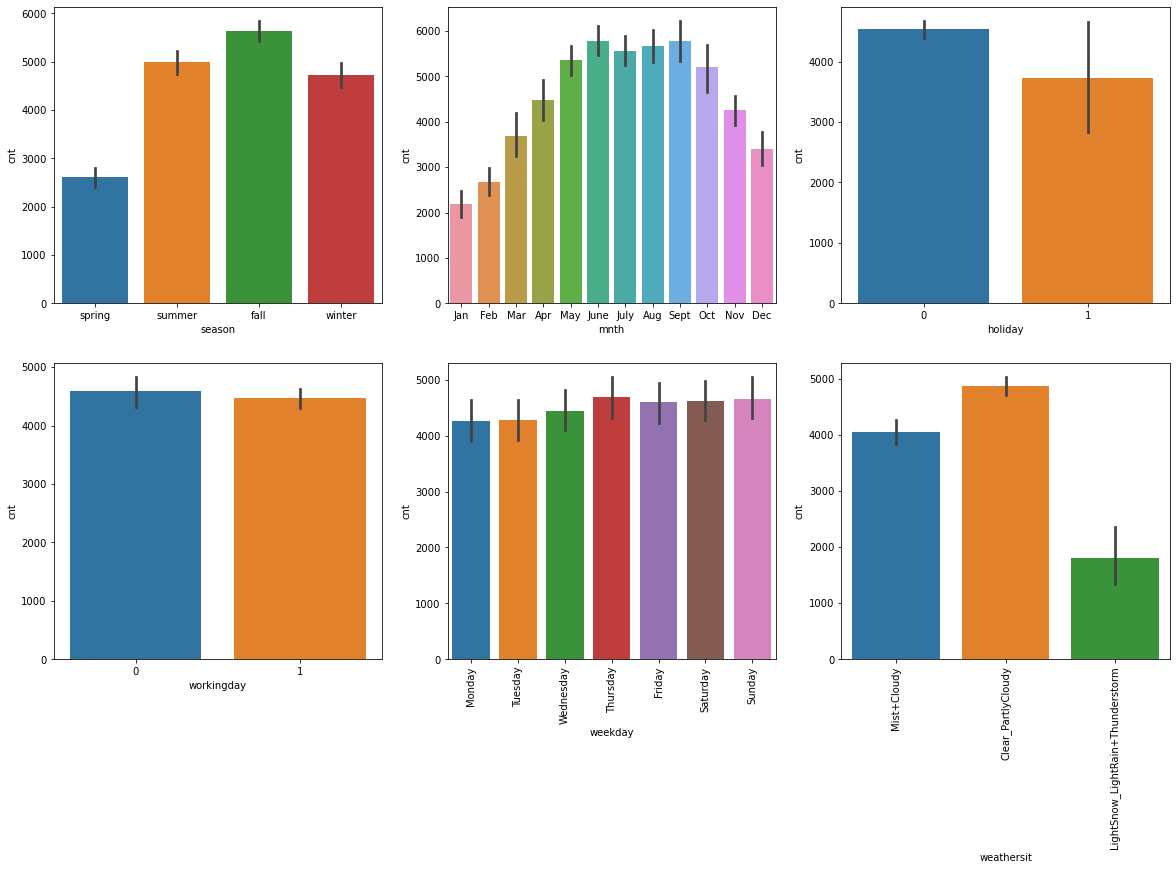

In [92]:
#Plotting barplot
plt.figure(figsize=(20, 12))
plt.subplot(2,3,1)
sns.barplot(data = bike1, x = 'season', y = 'cnt')          #cnt Vs season
plt.subplot(2,3,2)
sns.barplot(data = bike1, x = 'mnth', y = 'cnt')           #cnt Vs mnth
plt.subplot(2,3,3)
sns.barplot(data = bike1, x = 'holiday', y = 'cnt')        #cnt Vs holiday
plt.subplot(2,3,4)
sns.barplot(data = bike1, x = 'workingday', y = 'cnt')     #cnt Vs workingday
plt.subplot(2,3,5)
sns.barplot(data = bike1, x = 'weekday', y = 'cnt')        #cnt Vs weekday
plt.xticks(rotation=90)
plt.subplot(2,3,6)
sns.barplot(data = bike1, x = 'weathersit', y = 'cnt')     #cnt Vs weathersit
plt.xticks(rotation=90)
plt.show()

- cnt vs mnth : We can observe that most of the bookings were done in the months April to October.
- cnt vs weathersit : We can observe that less bookings are done when there is light snow or light rain or thinderstorm.

## 4. Dummy variables

In [93]:
#Creating dummy variables
bike1 = pd.get_dummies(bike1, drop_first=True)
bike1.head() 

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
0,0,0,1,18.18125,80.5833,10.749882,985,1,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,1,17.68695,69.6087,16.652113,801,1,0,0,...,0,0,0,0,0,0,1,0,0,1
2,0,0,1,9.47025,43.7273,16.636703,1349,1,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,0,1,10.60610,59.0435,10.739832,1562,1,0,0,...,0,0,0,0,0,1,0,0,0,0
4,0,0,1,11.46350,43.6957,12.522300,1600,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [94]:
#Checking info for better understanding
bike1.info()     

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 29 columns):
 #   Column                                       Non-Null Count  Dtype  
---  ------                                       --------------  -----  
 0   yr                                           730 non-null    int64  
 1   holiday                                      730 non-null    int64  
 2   workingday                                   730 non-null    int64  
 3   atemp                                        730 non-null    float64
 4   hum                                          730 non-null    float64
 5   windspeed                                    730 non-null    float64
 6   cnt                                          730 non-null    int64  
 7   season_spring                                730 non-null    uint8  
 8   season_summer                                730 non-null    uint8  
 9   season_winter                                730 non-null    uint8  
 10  mn

## 5. Splitting data into Training and Testing Sets

In [95]:
#Spliting into train test set
np.random.seed(0)
bike_train, bike_test = train_test_split(bike1, train_size = 0.7, test_size = 0.3, random_state = 100)

In [96]:
#Checking the train dataset
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,23.0423,55.8333,12.208807,7534,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,33.1448,70.4167,11.083475,7216,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,20.6746,62.1250,10.792293,4066,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,11.5850,48.3333,23.500518,1796,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,18.8752,48.9583,8.708325,4220,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [97]:
#Checking the shape of train dataset
bike_train.shape

(510, 29)

In [98]:
#Checking the test dataset
bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
184,0,1,0,33.27085,63.7917,5.459106,6043,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,36.04875,59.2083,7.625404,6211,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,22.85230,81.2917,13.250121,2659,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,34.24915,42.4167,13.417286,4780,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,32.19710,30.5000,19.583229,4968,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [99]:
#Checking the shape of test dataset
bike_test.shape

(219, 29)

## 6. Rescaling

In [100]:
#Rescaling using MinMax scaling
scaler = MinMaxScaler()                    

In [101]:
#Applying scaler() to all the columns except the '0/1' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']  #saving required columns in the list 
bike_train[num_vars] = scaler.fit_transform(bike_train[num_vars])    
bike_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0.864243,0,0,1,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0.827658,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,0.465255,1,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,0.204096,1,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0.482973,0,1,0,...,0,0,0,0,1,0,0,0,0,1


In [102]:
#Dividing train set into X and y sets for the model building
y_train = bike_train.pop("cnt") 
X_train = bike_train

In [103]:
#Checking the X_train dataset
X_train.head()

,yr,holiday,workingday,atemp,hum,windspeed,season_spring,season_summer,season_winter,mnth_Aug,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
653,1,0,1,0.501133,0.575354,0.300794,0,0,1,0,...,1,0,0,0,0,0,0,1,0,0
576,1,0,1,0.766351,0.725633,0.264686,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
426,1,0,0,0.438975,0.640189,0.255342,1,0,0,0,...,0,0,0,0,1,0,0,0,0,1
728,1,0,1,0.200348,0.498067,0.663106,1,0,0,0,...,0,0,1,0,0,0,0,0,0,0
482,1,0,0,0.391735,0.504508,0.188475,0,1,0,0,...,0,0,0,0,1,0,0,0,0,1


In [104]:
#Checking y_train dataset
y_train.head()

653    0.864243
576    0.827658
426    0.465255
728    0.204096
482    0.482973
Name: cnt, dtype: float64

## 7. Building the model

### Using RFE approach for the feature selection

In [105]:
#Running RFE with the output of 15 variable
lr = LinearRegression()
lr.fit(X_train , y_train)
rfe = RFE(lr , 15)   
rfe = rfe.fit(X_train , y_train)

In [106]:
list(zip(X_train.columns , rfe.support_ , rfe.ranking_ ))

[('yr', True, 1),
 ('holiday', True, 1),
 ('workingday', False, 2),
 ('atemp', True, 1),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_spring', False, 5),
 ('season_summer', True, 1),
 ('season_winter', True, 1),
 ('mnth_Aug', True, 1),
 ('mnth_Dec', True, 1),
 ('mnth_Feb', True, 1),
 ('mnth_Jan', True, 1),
 ('mnth_July', False, 10),
 ('mnth_June', False, 7),
 ('mnth_Mar', False, 14),
 ('mnth_May', False, 6),
 ('mnth_Nov', True, 1),
 ('mnth_Oct', False, 12),
 ('mnth_Sept', True, 1),
 ('weekday_Monday', False, 9),
 ('weekday_Saturday', False, 3),
 ('weekday_Sunday', False, 4),
 ('weekday_Thursday', False, 13),
 ('weekday_Tuesday', False, 8),
 ('weekday_Wednesday', False, 11),
 ('weathersit_LightSnow_LightRain+Thunderstorm', True, 1),
 ('weathersit_Mist+Cloudy', True, 1)]

In [107]:
#Creating a list for RFE selected columns
col = X_train.columns[rfe.support_]
col

Index(['yr', 'holiday', 'atemp', 'hum', 'windspeed', 'season_summer',
       'season_winter', 'mnth_Aug', 'mnth_Dec', 'mnth_Feb', 'mnth_Jan',
       'mnth_Nov', 'mnth_Sept', 'weathersit_LightSnow_LightRain+Thunderstorm',
       'weathersit_Mist+Cloudy'],
      dtype='object')

### Building model using statsmodel

In [108]:
#Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

## Model 1

In [109]:
#Adding a constant variable
X_train_rfe1 = sm.add_constant(X_train_rfe)
#Running the linear model
lr1 = sm.OLS(y_train , X_train_rfe1).fit()
#Printing summary of the linear regression model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.842
Model:                            OLS   Adj. R-squared:                  0.837
Method:                 Least Squares   F-statistic:                     175.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.26e-186
Time:                        17:38:46   Log-Likelihood:                 508.57
No. Observations:                 510   AIC:                            -985.1
Df Residuals:                     494   BIC:                            -917.4
Df Model:                          15                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [110]:
#creating a dataframe
vif = pd.DataFrame()  
# saving dataframe to new variable
X = X_train_rfe               
vif['Features'] = X.columns         #Adding columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]   #Calculating VIF
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
3,hum,25.11
2,atemp,14.42
4,windspeed,3.89
6,season_winter,3.04
5,season_summer,2.28
14,weathersit_Mist+Cloudy,2.24
0,yr,2.06
10,mnth_Jan,1.92
11,mnth_Nov,1.85
8,mnth_Dec,1.63


- We have high VIF value for "hum", So we drop column "hum".

In [111]:
#Dropping "hum" column
X_train_rfe.drop(["hum"] , axis = 1 , inplace = True)

## Model 2

In [112]:
#Adding a constant variable
X_train_rfe2 = sm.add_constant(X_train_rfe)
#Running the linear model
lr2 = sm.OLS(y_train , X_train_rfe2).fit()
#Printing summary of the linear regression model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.836
Model:                            OLS   Adj. R-squared:                  0.831
Method:                 Least Squares   F-statistic:                     180.0
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          7.00e-184
Time:                        17:38:57   Log-Likelihood:                 499.30
No. Observations:                 510   AIC:                            -968.6
Df Residuals:                     495   BIC:                            -905.1
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [113]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.99
3,windspeed,3.83
5,season_winter,2.62
0,yr,2.06
4,season_summer,2.04
10,mnth_Nov,1.81
6,mnth_Aug,1.59
13,weathersit_Mist+Cloudy,1.57
7,mnth_Dec,1.41
11,mnth_Sept,1.35


- We do not drop "atemp" as it is important variable.
- Dropping the "windspeed" column as it have high VIF value after "atemp". 

In [114]:
#Dropping "windspeed" column
X_train_rfe.drop(["windspeed"] , axis = 1, inplace = True)

## Model 3

In [115]:
#Adding a constant variable
X_train_rfe3= sm.add_constant(X_train_rfe)
#Running the linear model
lr3 = sm.OLS(y_train , X_train_rfe3).fit()
#Printing summary of the linear regression model
print(lr3.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.825
Model:                            OLS   Adj. R-squared:                  0.820
Method:                 Least Squares   F-statistic:                     179.5
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          5.75e-178
Time:                        17:39:08   Log-Likelihood:                 482.49
No. Observations:                 510   AIC:                            -937.0
Df Residuals:                     496   BIC:                            -877.7
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [116]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.98
4,season_winter,2.60
0,yr,2.04
3,season_summer,1.91
9,mnth_Nov,1.77
5,mnth_Aug,1.59
12,weathersit_Mist+Cloudy,1.56
6,mnth_Dec,1.37
10,mnth_Sept,1.35
8,mnth_Jan,1.15


- Drop "mnth_Nov" as it p-value higher than others.

In [117]:
#Dropping "mnth_Nov"
X_train_rfe.drop(['mnth_Nov'], axis=1 , inplace = True)

## Model 4

In [118]:
#Adding a constant variable
X_train_rfe4 = sm.add_constant(X_train_rfe)
#Running the linear model
lr4 = sm.OLS(y_train , X_train_rfe4).fit()
#Printing summary of the linear regression model
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.823
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     192.6
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          3.98e-178
Time:                        17:39:22   Log-Likelihood:                 480.13
No. Observations:                 510   AIC:                            -934.3
Df Residuals:                     497   BIC:                            -879.2
Df Model:                          12                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [119]:
#Checking VIF values
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.98
0,yr,2.04
3,season_summer,1.91
4,season_winter,1.73
5,mnth_Aug,1.59
11,weathersit_Mist+Cloudy,1.56
9,mnth_Sept,1.33
6,mnth_Dec,1.22
8,mnth_Jan,1.15
7,mnth_Feb,1.11


- Drop the variable with high p-value "mnth_Dec".

In [120]:
#Dropping the "mnth_Feb" column
X_train_rfe.drop(["mnth_Dec"], axis = 1, inplace = True)

## Model 5

In [121]:
#Adding a constant variable
X_train_rfe5 = sm.add_constant(X_train_rfe)
#Running the linear model
lr5 = sm.OLS(y_train , X_train_rfe5).fit()
#Printing summary of the linear regression model
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     209.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.06e-178
Time:                        17:39:33   Log-Likelihood:                 478.71
No. Observations:                 510   AIC:                            -933.4
Df Residuals:                     498   BIC:                            -882.6
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [122]:
#Checking VIF values
vif = pd.DataFrame()
X = X_train_rfe
vif["Features"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range (X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.98
0,yr,2.03
3,season_summer,1.91
5,mnth_Aug,1.59
4,season_winter,1.58
10,weathersit_Mist+Cloudy,1.55
8,mnth_Sept,1.32
7,mnth_Jan,1.15
6,mnth_Feb,1.11
9,weathersit_LightSnow_LightRain+Thunderstorm,1.06


- Drop the variable "mnth_Feb" with high p-value.

In [123]:
X_train_rfe.drop(["mnth_Feb"], axis=1, inplace = True)

## Model 6

In [124]:
#Adding a constant variable
X_train_rfe6 = sm.add_constant(X_train_rfe)
#Running the linear model
lr6 = sm.OLS(y_train , X_train_rfe6).fit()
#Printing summary of the linear regression model
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.821
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          2.35e-179
Time:                        17:39:44   Log-Likelihood:                 477.44
No. Observations:                 510   AIC:                            -932.9
Df Residuals:                     499   BIC:                            -886.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [125]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.92
0,yr,2.00
3,season_summer,1.84
5,mnth_Aug,1.55
4,season_winter,1.53
9,weathersit_Mist+Cloudy,1.52
7,mnth_Sept,1.30
6,mnth_Jan,1.14
8,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Still it have high p-value for the "mnth_Jan". So we drop it.

In [126]:
#Dropping the column "mnth_Jan"
X_train_rfe.drop(['mnth_Jan'], axis = 1, inplace=True)

## Model 7

In [127]:
#Adding a constant variable
X_train_rfe7 = sm.add_constant(X_train_rfe)
#Running the linear model
lr7 = sm.OLS(y_train , X_train_rfe7).fit()
#Printing summary of the linear regression model
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          6.93e-180
Time:                        17:39:56   Log-Likelihood:                 475.83
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     500   BIC:                            -889.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [128]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.91
0,yr,1.93
3,season_summer,1.79
5,mnth_Aug,1.53
4,season_winter,1.48
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.28
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Now we have better p-values and VIF values.

### Now adding some variables to see if model significance increases or not.

## Model 8

- Adding "workingday" to see the impact on model significance.

In [129]:
#Adding "workingday" column
X_train_rfe["workingday"] = X_train["workingday"]

In [130]:
#Adding a constant variable
X_train_rfe8 = sm.add_constant(X_train_rfe)
#Running the linear model
lr8 = sm.OLS(y_train , X_train_rfe8).fit()
#Printing summary of the linear regression model
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.819
Method:                 Least Squares   F-statistic:                     230.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          5.32e-180
Time:                        17:40:23   Log-Likelihood:                 478.96
No. Observations:                 510   AIC:                            -935.9
Df Residuals:                     499   BIC:                            -889.4
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [131]:
#Checking VIF values 
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,5.10
9,workingday,2.91
0,yr,1.96
3,season_summer,1.80
4,season_winter,1.55
5,mnth_Aug,1.53
8,weathersit_Mist+Cloudy,1.45
6,mnth_Sept,1.29
1,holiday,1.06
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06


- Adding "workingday" do not have much impact on the model significance.
- It increased p-value and VIF value for some of the variables. So we have to drop it.

In [132]:
#Dropping "workingday" column
X_train_rfe.drop(["workingday"], axis =1 ,inplace = True)

## Model 9

- Adding "weekday_Monday" to see the impact on the model.

In [133]:
#Adding "weekday_Monday"
X_train_rfe['weekday_Monday'] = X_train['weekday_Monday']

In [134]:
#Adding a constant variable
X_train_rfe9 = sm.add_constant(X_train_rfe)
#Running the linear model
lr9 = sm.OLS(y_train , X_train_rfe9).fit()
#Printing summary of the linear regression model
print(lr9.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.818
Method:                 Least Squares   F-statistic:                     229.7
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          1.46e-179
Time:                        17:40:40   Log-Likelihood:                 477.93
No. Observations:                 510   AIC:                            -933.9
Df Residuals:                     499   BIC:                            -887.3
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [135]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,4.02
0,yr,1.94
3,season_summer,1.79
5,mnth_Aug,1.53
4,season_winter,1.49
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.29
9,weekday_Monday,1.15
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- By adding "weekday_Monday" doesn't have much effect on  model significance. so we will drop it.

In [136]:
#Dropping the column
X_train_rfe.drop(['weekday_Monday'], axis = 1, inplace=True)

## Model 10

- Adding "mnth_May" to see the impact on the model.

In [137]:
#Adding "mnth_May"
X_train_rfe['mnth_May'] = X_train['mnth_May']

In [138]:
#Adding a constant variable
X_train_rfe10 = sm.add_constant(X_train_rfe)
#Running the linear model
lr10 = sm.OLS(y_train , X_train_rfe10).fit()
#Printing summary of the linear regression model
print(lr10.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     227.8
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          7.79e-179
Time:                        17:40:53   Log-Likelihood:                 476.21
No. Observations:                 510   AIC:                            -930.4
Df Residuals:                     499   BIC:                            -883.8
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

In [139]:
#Checking VIF values again
vif = pd.DataFrame()
X = X_train_rfe
vif['Features'] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values , i) for i in range(X.shape[1])]
vif["VIF"] = round(vif["VIF"] , 2)
vif = vif.sort_values(by = "VIF" , ascending = False)
vif

,Features,VIF
2,atemp,3.95
3,season_summer,2.23
0,yr,1.95
9,mnth_May,1.55
5,mnth_Aug,1.53
4,season_winter,1.49
8,weathersit_Mist+Cloudy,1.44
6,mnth_Sept,1.29
7,weathersit_LightSnow_LightRain+Thunderstorm,1.06
1,holiday,1.03


- Adding "mnth_May" increases p-value of itself, hence we drop it.

In [140]:
#Dropping the column "mnth_May"
X_train_rfe.drop(['mnth_May'], axis = 1, inplace=True)

## Out of all models above, we choose model 7 which give good R-squared and F-static value.

In [141]:
#Printing the summary of best model i.e (Model 7)
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.820
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     253.1
Date:                Sun, 03 Apr 2022   Prob (F-statistic):          6.93e-180
Time:                        17:42:55   Log-Likelihood:                 475.83
No. Observations:                 510   AIC:                            -931.7
Df Residuals:                     500   BIC:                            -889.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                                                  coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------------------

## 8.3 Residual Analysis of the train data

In [142]:
y_train_pred = lr7.predict(X_train_rfe7)

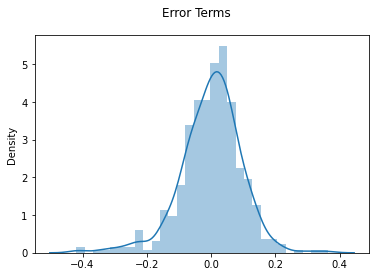

In [143]:
#Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((y_train - y_train_pred))
fig.suptitle('Error Terms')                  # Plot heading 
plt.show()

- From the above histogram, we could see that Residuals are normally distributed. Hence our assumption for Linear Regression is valid.

## 9. Making Predictions using the final model

In [144]:
#Apply scaler() to all the columns except the '0/1' and 'dummy' variables
num_vars = ['atemp', 'hum', 'windspeed', 'cnt']
bike_test[num_vars] = scaler.transform(bike_test[num_vars])   #Transform the data 

bike_test.head()

,yr,holiday,workingday,atemp,hum,windspeed,cnt,season_spring,season_summer,season_winter,...,mnth_Oct,mnth_Sept,weekday_Monday,weekday_Saturday,weekday_Sunday,weekday_Thursday,weekday_Tuesday,weekday_Wednesday,weathersit_LightSnow_LightRain+Thunderstorm,weathersit_Mist+Cloudy
184,0,1,0,0.769660,0.657364,0.084219,0.692706,0,0,0,...,0,0,0,0,0,0,0,1,0,1
535,1,0,1,0.842587,0.610133,0.153728,0.712034,0,1,0,...,0,0,0,0,0,1,0,0,0,0
299,0,0,0,0.496145,0.837699,0.334206,0.303382,0,0,1,...,1,0,0,1,0,0,0,0,0,1
221,0,0,1,0.795343,0.437098,0.339570,0.547400,0,0,0,...,0,0,0,0,0,0,0,0,0,0
152,0,0,0,0.741471,0.314298,0.537414,0.569029,0,1,0,...,0,0,0,1,0,0,0,0,0,0


In [145]:
#Dividing test dataset into X and y datasets
y_test = bike_test.pop('cnt')
X_test = bike_test

In [146]:
#Dropping "const" column from the data set
X_train_new = X_train_rfe7.drop(['const'], axis=1) 

- Use model 7 (lr7) for predicting the values

In [147]:
#Creating new dataframe X_test_1 by dropping variables from X_test
X_test_1 = X_test[ X_train_new.columns ]
#Adding a constant variable
X_test_1 = sm.add_constant(X_test_1)

In [148]:
#Making Predictions
y_pred = lr7.predict(X_test_1)      

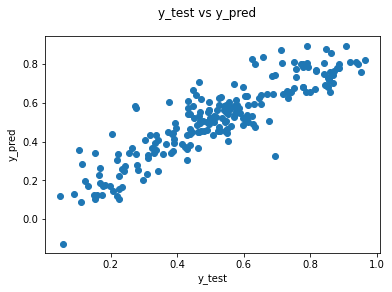

In [149]:
#Checking predicted vs test data
fig = plt.figure()
plt.scatter(y_test,y_pred)
fig.suptitle('y_test vs y_pred')
plt.xlabel('y_test')
plt.ylabel('y_pred')    
plt.show()

- We have good predict demand of bikes. The actual and predicted cnt i.e demand significantly overlapped, Here the model is able to explain the change in demand very well.

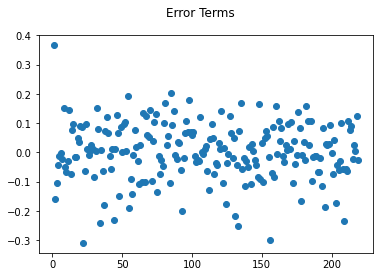

In [150]:
#Checking error terms
c = [i for i in range(1,220,1)]
fig = plt.figure()
plt.scatter(c, y_test-y_pred)
fig.suptitle('Error Terms')              
plt.show()

- There is no pattern in error terms.
- Error terms are approximately normally distributed with mean zero.

In [151]:
#Returns the mean squared error; we'll take a square root
np.sqrt(mean_squared_error(y_test, y_pred))

0.09809580740734068

In [152]:
#Calculate the r square for test
r2_score(y_test, y_pred)

0.7973971218586231

We can see that bike sharing demand depends on following variables:
- yr
- holiday
- atemp
- season_summer
- season_winter
- mnth_Aug
- mnth_Sept
- weathersit_LightSnow_LightRain+Thunderstorm
- weathersit_Mist+Cloudy

R-squared for train set = 82.0 <br>
R-squared for test set = 79.7